# UNIDADE 2 - Visão de nível médio

* Recognition in three steps:
1) Detection
2) Description
3) Matching

## Questões:

### Detection

#### Pergunta: Quais são as principais abordagens utilizadas na detecção de objetos?
#### Resposta: 
1. Janela Deslizante: Essa abordagem envolve escanear uma imagem com uma janela de tamanho fixo em diferentes escalas e localizações. Classificadores ou modelos de aprendizado profundo são então aplicados para classificar cada janela como contendo um objeto ou não.

2. Proposta de Região: Esse método gera regiões potenciais de objetos em uma imagem usando técnicas como busca seletiva ou redes de proposta de região. Essas regiões são então classificadas para determinar se contêm objetos.

3. Detectores de Único Disparo (SSDs, na sigla em inglês): Os SSDs combinam a localização e classificação de objetos em um único modelo. Eles prevêem as caixas delimitadoras e as probabilidades de classe diretamente a partir de caixas âncora pré-definidas em diferentes escalas

### Description

#### Pergunta: Como os descritores de características capturam a distinção no reconhecimento visual?
#### Resposta: 
Os descritores de características capturam a distinção codificando informações visuais locais ao redor dos pontos de interesse. Eles levam em consideração as relações espaciais, gradientes de intensidade, padrões de textura ou histogramas de cor. Esses descritores são projetados para serem robustos a transformações de imagem, como rotação, escala e mudanças de iluminação. Descritores populares incluem o Transformada Invariante à Escala de Características (SIFT, na sigla em inglês), Características Robustas em Alta Velocidade (SURF, na sigla em inglês) e BRIEF Orientado a FAST e Rotacionado (ORB, na sigla em inglês).

### Matching
#### Pergunta: Quais são os desafios enfrentados na correspondência de características?
#### Resposta:
1. Ambiguidade: Diferentes pontos de interesse podem ter descritores semelhantes, levando a correspondências incorretas. Técnicas robustas de correspondência e estratégias de filtragem são utilizadas para lidar com esses casos.

2. Oclusão: Pontos de interesse ocluídos ou parcialmente visíveis podem dificultar a correspondência precisa. Algoritmos robustos de correspondência podem lidar com oclusões parciais ou incorporar informações contextuais para melhorar a correspondência.

3. Mudanças de Iluminação e Ponto de Vista: Variações de iluminação e mudanças de ponto de vista podem afetar a aparência dos pontos de interesse, tornando desafiador encontrar correspondências confiáveis. Descritores de características e algoritmos de correspondência projetados para serem invariantes a essas variações podem mitigar esses efeitos.

4. Fundos Clusterizados: Pontos de interesse em fundos clutterizados ou complexos podem introduzir correspondências falsas. Algoritmos robustos de seleção e correspondência de características podem ajudar a reduzir o impacto do clutter de fundo.

## Exercício prático de programação: Extração de características com o descritor HOG

### Objetivo
Implementar um algoritmo de extração de características usando o descritor Histogram of Oriented Gradients (HOG) para identificar padrões e características distintivas em imagens.

### Solução

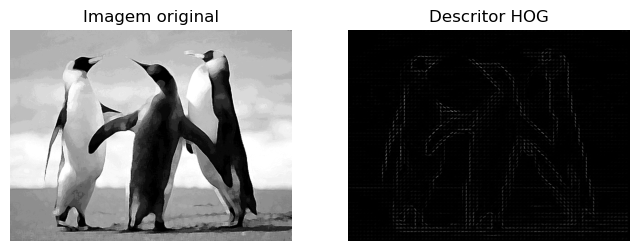

Características extraídas: [0.         0.         0.         ... 0.21526131 0.         0.        ]


In [3]:
from skimage.feature import hog
from skimage import io
import matplotlib.pyplot as plt

def extract_features(image_path):
    # Carregar a imagem de entrada
    image = io.imread(image_path, as_gray=True)

    # Definir os parâmetros do descritor HOG
    orientations = 9
    pixels_per_cell = (8, 8)
    cells_per_block = (2, 2)

    # Calcular o descritor HOG para a imagem
    features, hog_image = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                              cells_per_block=cells_per_block, visualize=True)

    # Exibir a imagem original e a imagem HOG
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    ax1.axis('off')
    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Imagem original')

    ax2.axis('off')
    ax2.imshow(hog_image, cmap=plt.cm.gray)
    ax2.set_title('Descritor HOG')

    plt.show()

    # Retornar as características extraídas
    return features

# Especificar o caminho para a imagem de entrada
image_path = 'penguins.png'

# Chamar a função de extração de características
features = extract_features(image_path)

# Imprimir as características extraídas
print("Características extraídas:", features)